In [1]:
#CONTOH A/B TESTING DENGAN DATA TIDAK NORMAL 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu

In [2]:
#load data
df = pd.read_csv(r"C:\Users\pc230\OneDrive\Documents\PORTOFOLIO\AB Testing\data tidak normal.csv",sep=",")
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [3]:
print(df.groupby("VARIANT_NAME").agg("mean"))
print("\nData dibedakan berdasarkan 'VARIANT_NAME', lalu dicari rata-ratanya")

                  USER_ID   REVENUE
VARIANT_NAME                       
control       4989.436798  0.129013
variant       4972.776914  0.070070

Data dibedakan berdasarkan 'VARIANT_NAME', lalu dicari rata-ratanya


In [4]:
df_control = df[df["VARIANT_NAME"] == "control"]
df_variant = df[df["VARIANT_NAME"] == "variant"]
print(df_control.head())
print(df_variant.head())
print(df_control.shape,df_variant.shape)

   USER_ID VARIANT_NAME  REVENUE
1     2423      control      0.0
2     9411      control      0.0
3     7311      control      0.0
6     2849      control      0.0
7     9168      control      0.0
    USER_ID VARIANT_NAME  REVENUE
0       737      variant     0.00
4      6174      variant     0.00
5      2380      variant     0.00
8      6205      variant     0.00
13     2529      variant     2.15
(4984, 3) (5016, 3)


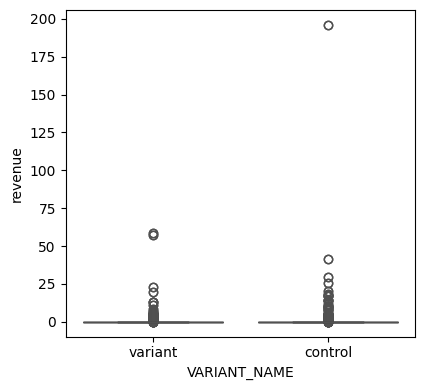

In [5]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(x = df["VARIANT_NAME"], y = df["REVENUE"], data = df[df["VARIANT_NAME"]=="control"])

sns.boxplot(x = df["VARIANT_NAME"], y = df["REVENUE"], data = df[df["VARIANT_NAME"]=="variant"])
plt.ylabel("revenue")

plt.tight_layout()
plt.show()

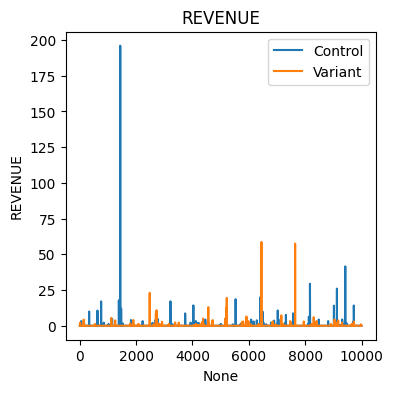

In [6]:
sns.color_palette("Set2")
plt.figure(figsize=(4, 4))
sns.lineplot(data=df_control, x=df_control.index, y='REVENUE', label='Control')
sns.lineplot(data=df_variant, x=df_variant.index, y='REVENUE', label='Variant')
plt.title('REVENUE')
plt.legend()

In [7]:
print(df_control["REVENUE"].describe())
print(df_variant["REVENUE"].describe())

print(f"""\nJumlah data kelompok kontrol adalah sebanyak {df_control["REVENUE"].count()},
Jumlah data kelompok variant adalah sebanyak {df_variant["REVENUE"].count()},
Rata-rata revenue untuk kelompok kontrol adalah {df_control["REVENUE"].mean():.4f},
Rata-rata revenue untuk kelompok variant adalah {df_variant["REVENUE"].mean():.4f}""")

print(f"""\n H0 : Tidak terdapat perbedaan yang signifikan antara 2 grup
\n H1 : Terdapat perbedaan yang signifikan antara 2 grup""")

count    4984.000000
mean        0.129013
std         3.007524
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       196.010000
Name: REVENUE, dtype: float64
count    5016.000000
mean        0.070070
std         1.314802
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.630000
Name: REVENUE, dtype: float64

Jumlah data kelompok kontrol adalah sebanyak 4984,
Jumlah data kelompok variant adalah sebanyak 5016,
Rata-rata revenue untuk kelompok kontrol adalah 0.1290,
Rata-rata revenue untuk kelompok variant adalah 0.0701

 H0 : Tidak terdapat perbedaan yang signifikan antara 2 grup

 H1 : Terdapat perbedaan yang signifikan antara 2 grup


In [8]:
#Uji Shapiro-Wilk untuk menguji kenormalan data
test_stat, pvalue = shapiro(df_control["REVENUE"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
print("\np-value < 0.05 menandakan bahwa data tidak berdistribusi normal")

Test Stat = 0.0183, p-value = 0.0000

p-value < 0.05 menandakan bahwa data tidak berdistribusi normal


In [9]:
test_stat, pvalue = shapiro(df_variant["REVENUE"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
print("\np-value < 0.05 menandakan bahwa data tidak berdistribusi normal")

Test Stat = 0.0270, p-value = 0.0000

p-value < 0.05 menandakan bahwa data tidak berdistribusi normal


C:\Users\pc230\anaconda3\envs\learning\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
#Uji non-parametric mann whitney u test
statistic, pvalue = mannwhitneyu(df_control["REVENUE"],df_variant["REVENUE"])
print('Statistic = %.4f, p-value = %.4f' % (statistic, pvalue))

Statistic = 12521564.0000, p-value = 0.4783


In [11]:
#CONTOH A/B TESTING DENGAN DATA NORMAL DAN HOMOGEN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind

In [12]:
#load data
df_control = pd.read_csv(r"C:\Users\pc230\OneDrive\Documents\PORTOFOLIO\AB Testing\control_group.csv",sep=",")
df_variant = pd.read_csv(r"C:\Users\pc230\OneDrive\Documents\PORTOFOLIO\AB Testing\test_group.csv",sep=",")
print(df_control.head())
print(df_variant.head())

   Impression  Click  Purchase  Earning
0       82529   6090       665     2311
1       98050   3383       315     1743
2       82696   4168       458     1798
3      109914   4911       487     1696
4      108458   5988       441     1544
   Impression  Click  Purchase  Earning
0      120104   3217       702     1940
1      134776   3635       834     2929
2      107807   3057       423     2526
3      116445   4650       429     2281
4      145083   5201       750     2782


In [13]:
print(df_control['Purchase'].mean(),df_variant['Purchase'].mean())
print(df_control['Purchase'].shape,df_variant['Purchase'].shape)

550.9 582.05
(40,) (40,)


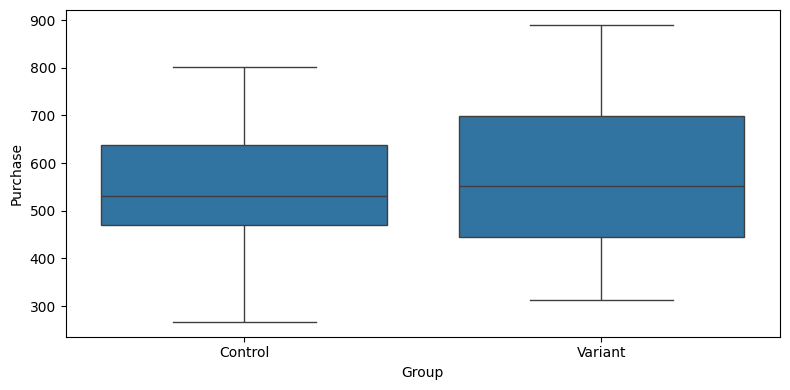

In [14]:
# Add a new column 'Group' to identify 'Control' and 'Variant'
df_control['Group'] = 'Control'
df_variant['Group'] = 'Variant'

# Concatenate the DataFrames
df_combined = pd.concat([df_control, df_variant], ignore_index=True)

# Plot the boxplot
sns.color_palette("Set2")
plt.figure(figsize=(8, 4))
sns.boxplot(x='Group', y='Purchase', data=df_combined)
plt.ylabel("Purchase")
plt.tight_layout()
plt.show()

<Figure size 400x400 with 0 Axes>

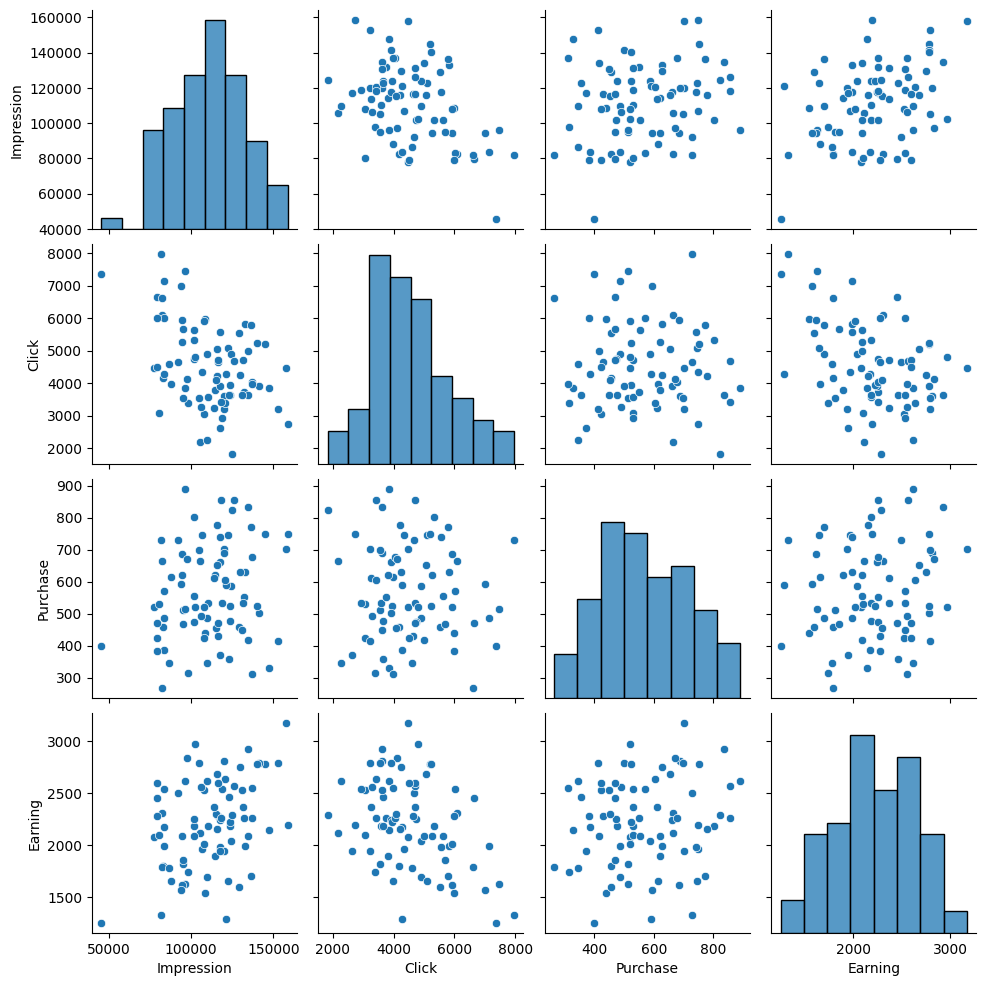

In [15]:
sns.color_palette("Set2", as_cmap=True)
plt.figure(figsize=(4, 4))
sns.pairplot(df_combined)
plt.show()

Text(0.5, 1.0, 'Earning')

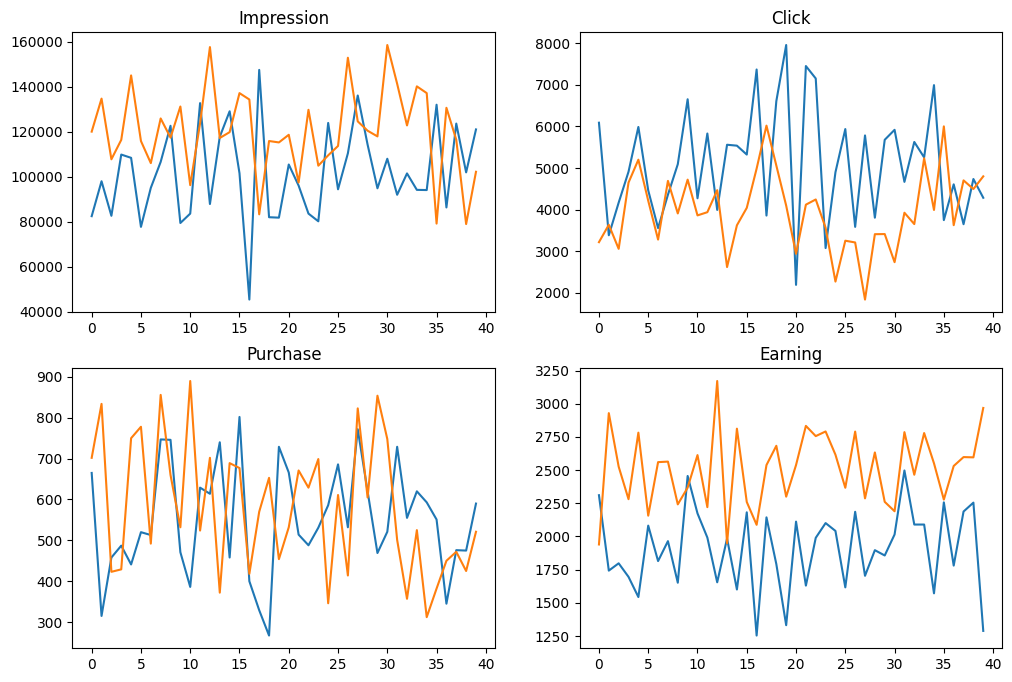

In [16]:
plt.figure(figsize=(12,8))
sns.color_palette("Set2")
plt.subplot(2,2,1)
plt.plot(df_control['Impression'])
plt.plot(df_variant['Impression'])
plt.title('Impression')

plt.subplot(2,2,2)
plt.plot(df_control['Click'])
plt.plot(df_variant['Click'])
plt.title('Click')

plt.subplot(2,2,3)
plt.plot(df_control['Purchase'])
plt.plot(df_variant['Purchase'])
plt.title('Purchase')

plt.subplot(2,2,4)
plt.plot(df_control['Earning'])
plt.plot(df_variant['Earning'])
plt.title('Earning')

In [17]:
print(df_control["Purchase"].describe())
print(df_variant["Purchase"].describe())

print(f"""\nJumlah data kelompok kontrol adalah sebanyak {df_control["Purchase"].count()},
Jumlah data kelompok variant adalah sebanyak {df_variant["Purchase"].count()},
Rata-rata revenue untuk kelompok kontrol adalah {df_control["Purchase"].mean():.4f},
Rata-rata revenue untuk kelompok variant adalah {df_variant["Purchase"].mean():.4f}""")

print(f"""\n H0 : Tidak terdapat perbedaan yang signifikan antara 2 grup
\n H1 : Terdapat perbedaan yang signifikan antara 2 grup""")

count     40.000000
mean     550.900000
std      134.110517
min      267.000000
25%      470.500000
50%      531.500000
75%      638.000000
max      802.000000
Name: Purchase, dtype: float64
count     40.000000
mean     582.050000
std      161.175164
min      312.000000
25%      444.750000
50%      551.000000
75%      699.750000
max      890.000000
Name: Purchase, dtype: float64

Jumlah data kelompok kontrol adalah sebanyak 40,
Jumlah data kelompok variant adalah sebanyak 40,
Rata-rata revenue untuk kelompok kontrol adalah 550.9000,
Rata-rata revenue untuk kelompok variant adalah 582.0500

 H0 : Tidak terdapat perbedaan yang signifikan antara 2 grup

 H1 : Terdapat perbedaan yang signifikan antara 2 grup


In [18]:
#Uji Shapiro-Wilk untuk menguji kenormalan data
test_stat, pvalue = shapiro(df_control["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
print("\np-value > 0.05 menandakan bahwa data berdistribusi normal")

Test Stat = 0.9774, p-value = 0.5929

p-value > 0.05 menandakan bahwa data berdistribusi normal


In [19]:
test_stat, pvalue = shapiro(df_variant["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
print("\np-value > 0.05 menandakan bahwa data berdistribusi normal")

Test Stat = 0.9589, p-value = 0.1541

p-value > 0.05 menandakan bahwa data berdistribusi normal


In [20]:
#UJI HOMOGENITAS VARIANS
test_stat, pvalue = levene(df_control["Purchase"],df_variant["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
print("\np-value > 0.05 menandakan bahwa data homogen")

Test Stat = 2.6403, p-value = 0.1082

p-value > 0.05 menandakan bahwa data homogen


In [21]:
#UJI T_TEST
test_stat, pvalue = ttest_ind(df_control["Purchase"],df_variant["Purchase"], equal_var = True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
print("\np-value > 0.05 menandakan bahwa tidak terdapat perbedaan rata-rata dari kedua grup")

Test Stat = -0.9396, p-value = 0.3503

p-value > 0.05 menandakan bahwa tidak terdapat perbedaan rata-rata dari kedua grup
